In [1]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import time

## LINESTRING2NDW SERVICE

This service provides traffic data from loop detectors. It covers most of the highways in the Netherlands.

In [12]:
linestring_fn = 'A4.txt'
with open (linestring_fn, 'r') as f:
    linestring = f.read()
linestring = json.loads(linestring)
postdata = {
    'service': 'linestring2ndw',
    'from_time': '13:50',
    'to_time': '14:15',
    'start_date': '2020-03-06',
    'linestring': linestring,
    'dostats': 0,
    'dotraveltime': 0
}

In [13]:
python_url='https://mirrors-ndw.citg.tudelft.nl/dataapi/service'

In [14]:
start = time.time()
res = requests.post(python_url, json=postdata, verify=False)
try:
    data = res.json()
except ValueError:
    print(res.text)
end = time.time()
print(end-start)

/Users/tinnguyen/.venv/cosi/lib/python3.8/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mirrors-ndw.citg.tudelft.nl'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


13.004426956176758


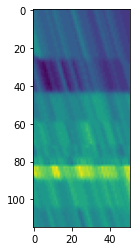

In [16]:
speed = np.array(data['data']['speed'])
speed = speed.astype(float)
speed[speed==99999] = np.NaN
plt.imshow(speed)